In [10]:
!pip install pm4py
!pip install graphviz


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install --upgrade pm4py


Defaulting to user installation because normal site-packages is not writeable


In [13]:
!which python

import graphviz
print(graphviz.__version__)

from pm4py.visualization.petri_net import visualizer as pn_visualizer
print("Graphviz and pm4py are working correctly!")


0.20.3
Graphviz and pm4py are working correctly!


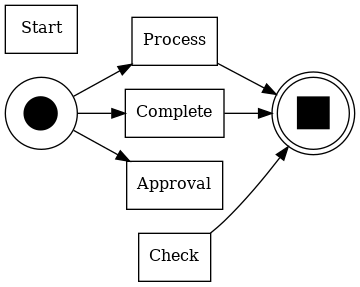

In [ ]:
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# CSV 파일 로드
df = pd.read_csv('ticket_process.csv')

# pm4py 형식에 맞게 컬럼명 변환
df.rename(columns={
    "case_id": "case:concept:name",
    "activity": "concept:name",
    "timestamp": "time:timestamp"
}, inplace=True)

# 타임스탬프 형식 변환
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

# DataFrame을 Event Log로 변환
df = dataframe_utils.convert_timestamp_columns_in_df(df)
log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)

# Alpha Miner 알고리즘 적용
net, initial_marking, final_marking = alpha_miner.apply(log)

# 모델 시각화
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)
